In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import operator

## Construct a company–company graph in which the companies are unicorns

In [27]:
U = pd.read_csv('unicorns.tsv', sep='\t')
I_in_u = pd.read_csv('investors_in_unicorns.tsv', sep='\t')

Unicorns = U.copy() # Copy dataframe to manipulate without changing the original
Investors_in_unicorns = I_in_u.copy()

In [28]:
unicorn_company = Unicorns[['Company']]
unicorn_investors = Investors_in_unicorns[['Company', 'Investor']]

unicorn_companies = pd.merge(unicorn_company, unicorn_investors, on='Company', how='outer')
unicorn_connected_companies = pd.merge(unicorn_companies, unicorn_companies, on='Investor', how='outer')

for index, row in unicorn_connected_companies.iterrows():
    if row['Company_x'] == row['Company_y']:
        unicorn_connected_companies.drop(index, inplace=True)

unique_unicorn_connected_companies = unicorn_connected_companies.drop_duplicates() 

unique_unicorn_connected_companies = unique_unicorn_connected_companies.dropna()

In [29]:
G_unicorns=nx.Graph()

for x in unique_unicorn_connected_companies[['Company_x', 'Company_y']].values:
    company_x = x[0].replace(' ','_')
    company_y = x[1].replace(' ','_')
    G_unicorns.add_edge( company_x, company_y )

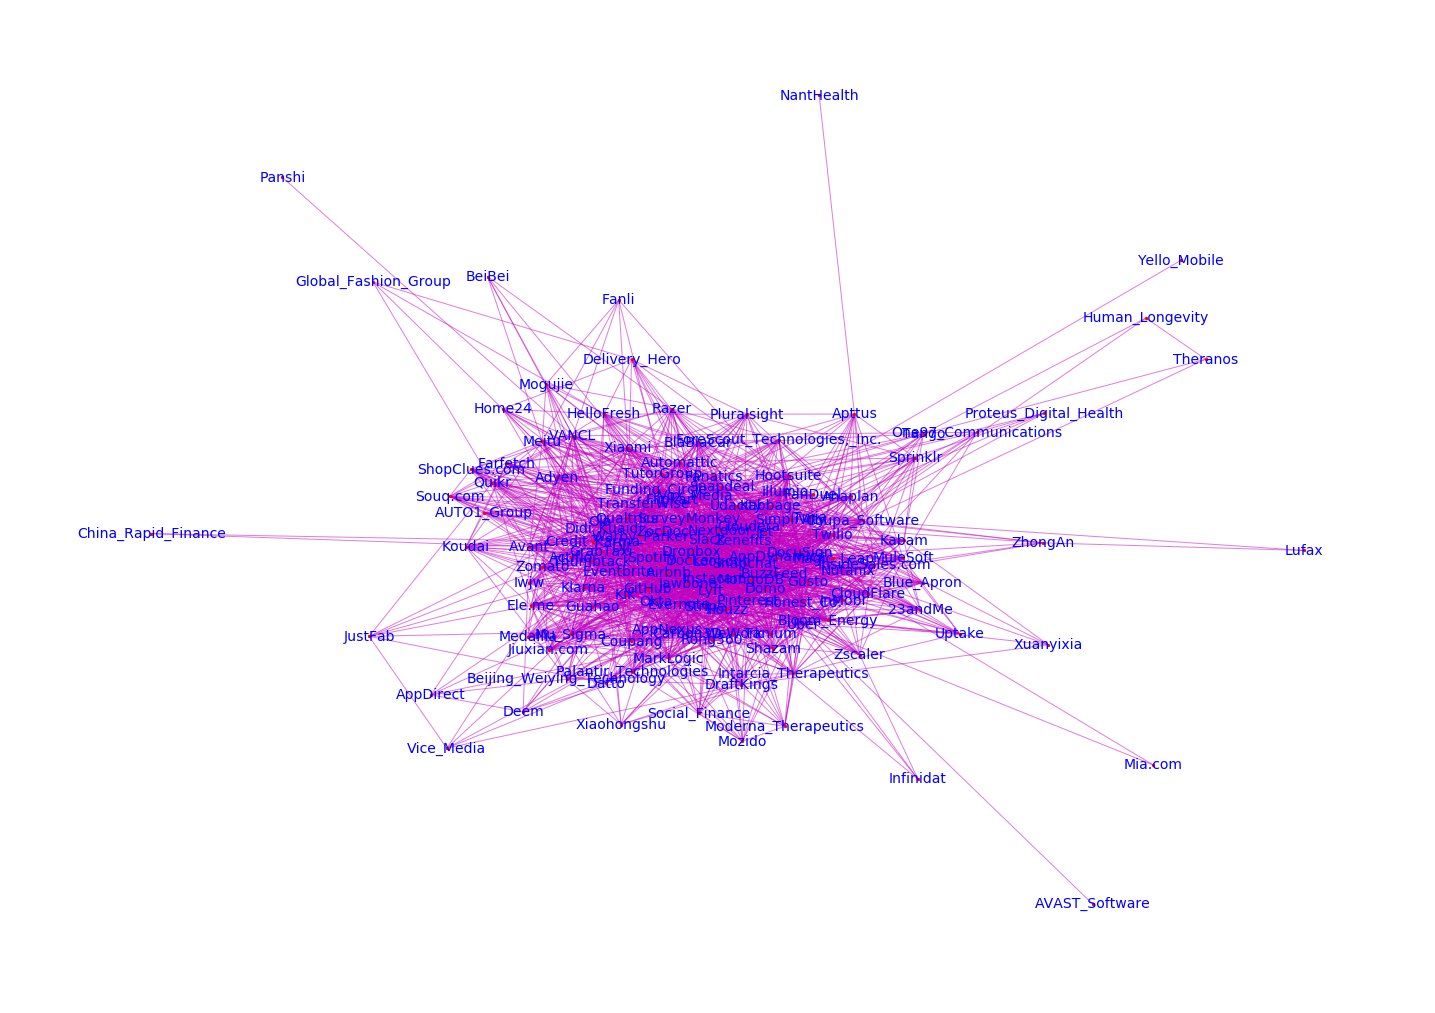

In [30]:
plt.figure(figsize=(25,18))

pos = nx.fruchterman_reingold_layout(G_unicorns) # positions for all nodes
""
# nodes
nx.draw_networkx_nodes(G_unicorns, pos, node_size=5)

nx.draw_networkx_edges(G_unicorns, pos, edgelist=[(u,v) for (u,v,d) in G_unicorns.edges(data=True)], width=1, edge_color="m", alpha=0.5)

nx.draw_networkx_labels(G_unicorns, pos, font_size=14, font_family='sans-serif', font_color="b", alpha=0.4)

plt.axis('off')

plt.show()

## Construct a company–company graph using the entire Crunchbase dataset

In [3]:
c = pd.read_csv("https://github.com/notpeter/crunchbase-data/blob/master/companies.csv?raw=true")
i = pd.read_csv("https://github.com/notpeter/crunchbase-data/blob/master/investments.csv?raw=true")

companies = c.copy() # Copy dataframe to manipulate without changing the original
investments = i.copy()

In [4]:
crunchbase_company = companies[['name']]
crunchbase_company = crunchbase_company.rename(columns = {'name':'company_name'})
crunchbase_investors = investments[['company_name', 'investor_name']]

crunchbase_companies = pd.merge(crunchbase_company, crunchbase_investors, on='company_name', how='outer')
crunchbase_companies = crunchbase_companies.dropna()

crunchbase_connected_companies = pd.merge(crunchbase_companies, crunchbase_companies, on='investor_name', how='outer')

crunchbase_connected_companies = crunchbase_connected_companies[crunchbase_connected_companies['company_name_x'] != 
                                   crunchbase_connected_companies['company_name_y']]

unique_crunchbase_connected_companies = crunchbase_connected_companies.drop_duplicates() 

In [5]:
G_crunchbase=nx.Graph()

for x in unique_crunchbase_connected_companies[['company_name_x', 'company_name_y']].values:
    company_name_x = x[0].replace(' ','_')
    company_name_y = x[1].replace(' ','_')
    G_crunchbase.add_edge( company_name_x, company_name_y )

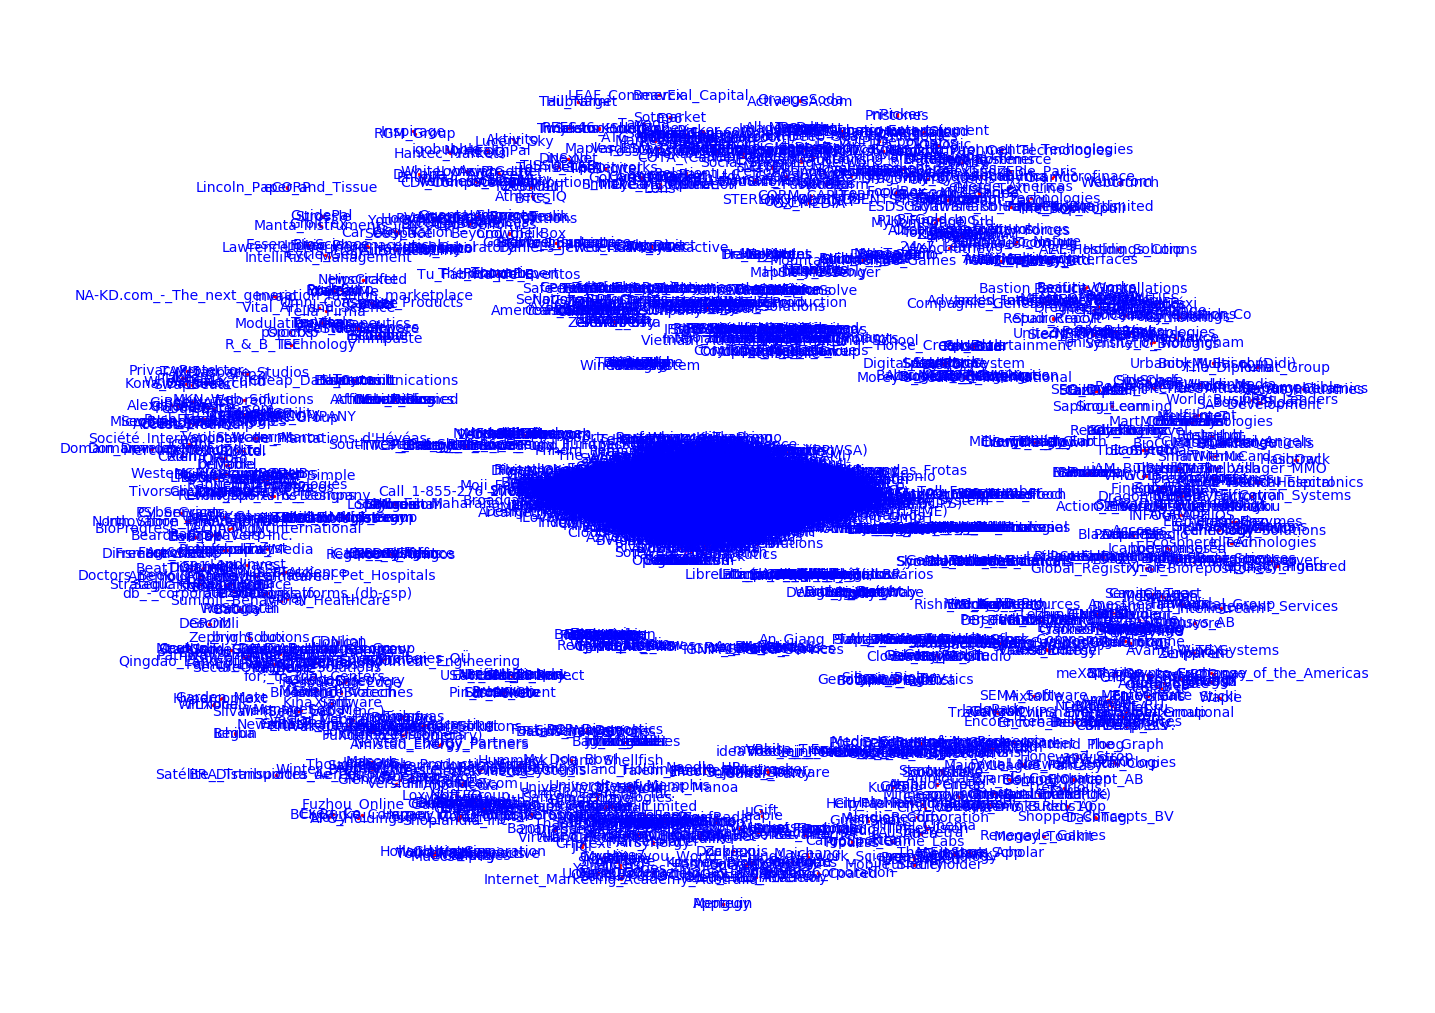

In [34]:
plt.figure(figsize=(25,18))

pos = nx.fruchterman_reingold_layout(G_crunchbase) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_crunchbase, pos, node_size=5)

nx.draw_networkx_edges(G_crunchbase, pos, edgelist=[(u,v) for (u,v,d) in G_crunchbase.edges(data=True)], width=1, edge_color="m", alpha=0.5)

nx.draw_networkx_labels(G_crunchbase, pos, font_size=14, font_family='sans-serif', font_color="b", alpha=0.4)

plt.axis('off')

plt.show()

## (a) determine the number of connected components

### unicorn

In [35]:
unicorn_cc = nx.number_connected_components(G_unicorns)
print('Number of connected components of unicorn companies: ' + str(unicorn_cc))

Number of connected components of unicorn companies: 1


### Crunchbase

In [36]:
crunchbase_cc = nx.number_connected_components(G_crunchbase)
print('Number of connected components of crunchbase companies: ' + str(crunchbase_cc))

Number of connected components of crunchbase companies: 456


## (b) compute the degree distribution and print nodes with the top 10 values

### unicorn

In [37]:
Pd_unicorns = {}

for key, value in G_unicorns.degree().items():
    Pd_unicorns[key] = value / len(G_unicorns)
Pd_unicorns = sorted(Pd_unicorns.items(), key = operator.itemgetter(1), reverse = True)    

print('Top ten nodes of unicorn companies with the highest degree distributions: \n')
for i in range(10):
    print(Pd_unicorns[i])

Top ten nodes of unicorn companies with the highest degree distributions: 

('Airbnb', 0.7410071942446043)
('Dropbox', 0.5539568345323741)
('Nextdoor', 0.5251798561151079)
('Lookout', 0.5251798561151079)
('Stripe', 0.5107913669064749)
('Ola', 0.5035971223021583)
('Domo', 0.5035971223021583)
('Snapchat', 0.49640287769784175)
('Jet', 0.4892086330935252)
('Uber', 0.48201438848920863)


### Crunchbase

In [38]:
Pd_crunchbase = {}

for key, value in G_crunchbase.degree().items():
    Pd_crunchbase[key] = value / len(G_crunchbase)
Pd_crunchbase = sorted(Pd_crunchbase.items(), key = operator.itemgetter(1), reverse = True)    

print('Top ten nodes of crunchbase companies with the highest degree distributions: \n')
for i in range(10):
    print(Pd_crunchbase[i])

Top ten nodes of crunchbase companies with the highest degree distributions: 

('FundersClub', 0.08070072564685186)
('Dropbox', 0.08070072564685186)
('Uber', 0.08060299543111242)
('Airbnb', 0.07972342348945735)
('Karma', 0.07842849813090963)
('AngelList', 0.07796427960614723)
('Mattermark', 0.07767108895892888)
('Ark', 0.07432382906985267)
('Zesty', 0.07087883896503702)
('Stripe', 0.07063451342568838)


## (c) determine whether the graph is scale-free by plotting the histogram for P(d) and determining whether log P(d) appears to be a linear function of d

### unicorn

log10(P(d)) does not appear to be a scale-free graph for the unicorns dataset.


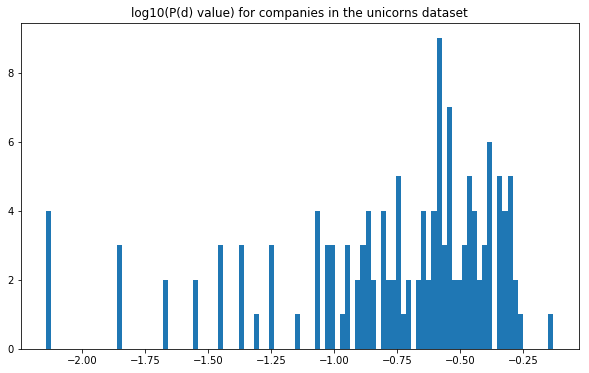

In [41]:
plt.rcParams['figure.figsize'] = (10.0,6.0)

Pd_unicorns_values = [el[1] for el in Pd_unicorns]

plt.hist(np.log10(Pd_unicorns_values), bins=100)
_ = plt.title('log10(P(d) value) for companies in the unicorns dataset')

print('log10(P(d)) does not appear to be a scale-free graph for the unicorns dataset.')

### Crunchbase

log10(P(d)) does not appear to be a scale-free graph for the crunchbase dataset.


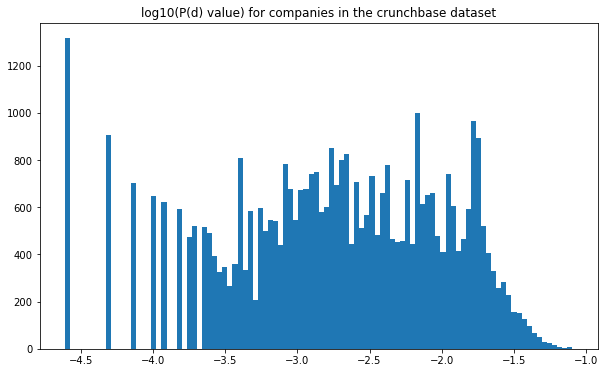

In [42]:
plt.rcParams['figure.figsize'] = (10.0,6.0)

Pd_crunchbase_values = [el[1] for el in Pd_crunchbase]

plt.hist(np.log10(Pd_crunchbase_values), bins=100)
_ = plt.title('log10(P(d) value) for companies in the crunchbase dataset')

print('log10(P(d)) does not appear to be a scale-free graph for the crunchbase dataset.')

## (d) compute eigenvector centrality of the nodes, and print nodes with the top 10 values

### unicorn

In [43]:
centrality_unicorns = nx.eigenvector_centrality(G_unicorns)
centrality_unicorns = sorted(centrality_unicorns.items(), key = operator.itemgetter(1), reverse = True)

print('Top ten nodes of unicorn companies with the highest node eigenvector centralities: \n')
for i in range(10):
    print(centrality_unicorns[i])

Top ten nodes of unicorn companies with the highest node eigenvector centralities: 

('Airbnb', 0.1900404394828088)
('Dropbox', 0.1669238773296275)
('Stripe', 0.1542778120198582)
('Lookout', 0.1536810142356945)
('Nextdoor', 0.15188756596865863)
('Instacart', 0.15116356203881287)
('Jawbone', 0.14854995163001652)
('Snapchat', 0.14795347212434007)
('Domo', 0.14539866634549684)
('Ola', 0.14161895594277404)


### Crunchbase

In [45]:
centrality_crunchbase = nx.eigenvector_centrality(G_crunchbase)
centrality_crunchbase = sorted(centrality_crunchbase.items(), key = operator.itemgetter(1), reverse = True)

print('Top ten nodes of crunchbase companies with the highest node eigenvector centralities: \n')
for i in range(10):
    print(centrality_crunchbase[i])

Top ten nodes of crunchbase companies with the highest node eigenvector centralities: 

('Mattermark', 0.045914343130158956)
('Zesty', 0.04515795883841474)
('E_la_Carte', 0.04486785341348761)
('Experiment', 0.04464550349794749)
('LeadGenius', 0.04375429608689896)
('Zencoder', 0.04336776657179591)
('Airbnb', 0.04232871660360578)
('Dropbox', 0.04206725954141686)
('Homejoy', 0.04194768227313869)
('PlanGrid', 0.04155963169857133)


## (e) determine the diameter of the largest component

### unicorn

In [46]:
diameter_unicorns = nx.diameter(G_unicorns)
print('Diameter of the largest component of unicorn companies: ' + str(diameter_unicorns))

Diameter of the largest component of unicorn companies: 4


### Crunchbase

In [15]:
G_crunchbase_cig=nx.Graph()

crunchbase_companies.head()

for x in crunchbase_companies[['company_name', 'investor_name']].values:
    company_name = x[0].replace(' ','_')
    investor_name = x[1].replace(' ','_')
    G_crunchbase_cig.add_edge( company_name, investor_name )   
   
G_crunchbase_connected = nx.connected_component_subgraphs(G_crunchbase_cig)
G_crunchbase_connected = list(G_crunchbase_connected)[0]

diameter_crunchbase = nx.diameter(G_crunchbase_connected)
print('Diameter of the largest component of crunchbase companies: ' + str(diameter_crunchbase))


Diameter of the largest component of crunchbase companies: 25


## (f) compute the clustering coefﬁcient and use it to determine whether the network is a small-world network

### unicorn

In [48]:
clus_coef_unicorns = nx.average_clustering(G_unicorns)
print('Clustering coefficient of unicorn companies: ' + str(clus_coef_unicorns))

ll_unicorns = nx.average_shortest_path_length(G_unicorns)
n_unicorns = nx.number_of_nodes(G_unicorns)
m_unicorns = nx.number_of_edges(G_unicorns)

random_G_unicorns = nx.dense_gnm_random_graph(n_unicorns, m_unicorns)
random_clus_coef_unicorns = nx.average_clustering(random_G_unicorns)
random_ll_unicorns = nx.average_shortest_path_length(random_G_unicorns)

gamma_unicorns = clus_coef_unicorns/random_clus_coef_unicorns
lambda_unicorns = ll_unicorns/random_ll_unicorns

if gamma_unicorns/lambda_unicorns > 1:
    print('The unicorn network is a small-world network.')
else:
    print('The unicorn network is not a small-world network.')

Clustering coefficient of unicorn companies: 0.6218026793429178
The unicorn network is a small-world network.


### Crunchbase

In [7]:
clus_coef_crunchbase = nx.average_clustering(G_crunchbase_connected)
print('Clustering coefficient of crunchbase companies: ' + str(clus_coef_crunchbase))

ll_crunchbase = nx.average_shortest_path_length(G_crunchbase_connected)
n_crunchbase = nx.number_of_nodes(G_crunchbase_connected)
m_crunchbase = nx.number_of_edges(G_crunchbase_connected)

random_G_crunchbase = nx.dense_gnm_random_graph(n_crunchbase, m_crunchbase)
random_clus_coef_crunchbase = nx.average_clustering(random_G_crunchbase)

random_G_crunchbase_connected = nx.connected_component_subgraphs(random_G_crunchbase)
random_G_crunchbase_connected = list(random_G_crunchbase_connected)[0]
random_ll_crunchbase = nx.average_shortest_path_length(random_G_crunchbase_connected)

gamma_crunchbase = clus_coef_crunchbase/random_clus_coef_crunchbase
lambda_crunchbase = ll_crunchbase/random_ll_crunchbase

if gamma_crunchbase/lambda_crunchbase > 1:
    print('The crunchbase network is a small-world network.')
else:
    print('The crunchbase network is not a small-world network.')

Clustering coefficient of crunchbase companies: 0.0021609860180251427
The crunchbase network is a small-world network.
